<a href="https://colab.research.google.com/github/Battula-Shilpa/-Machine-Learning/blob/main/2_Logistic_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Logistic Regression***

# **Basic Code**

In [1]:
#Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
week_data = [1,2,3,4,5]
sales_data = [2,4,5,4,5]

df = pd.DataFrame({'weeks': week_data,'sales': sales_data})
df

,weeks,sales
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [3]:
X = df['weeks'].values
Y = df['sales'].values
print(X)
print(Y)

[1 2 3 4 5]
[2 4 5 4 5]


In [4]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
n = len(X)
numer = 0
denor = 0
for i in range(n):
  numer += (X[i]-mean_x)*(Y[i]-mean_y)
  denor += (X[i]-mean_x)**2
  m = numer/denor
  c =mean_y -(m*mean_x)
print('m:',m,'c:',c)

m: 0.6 c: 2.2


Text(0, 0.5, 'Sales')

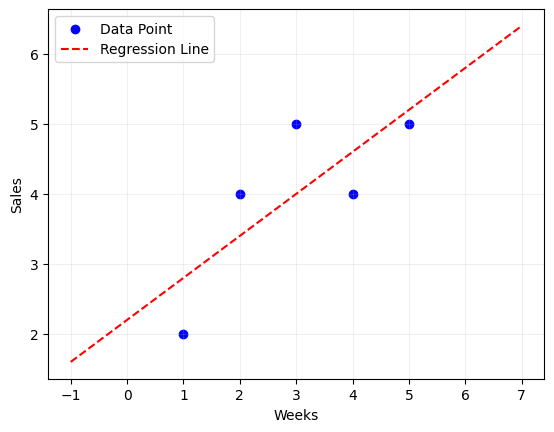

In [5]:
#plot
max_x = np.max(X)+2
min_x = np.min (X)-2
x = np.linspace(min_x,max_x)
y = c+m*x
plt.scatter(X,Y,color ='blue',label = 'Data Point')
plt.plot(x,y,color='red',label='Regression Line',linestyle='--')
plt.grid(True,alpha=0.2)
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Sales')

In [6]:
#R2
ss_res = 0
ss_tot = 0
for i in range(n):
  y_pred = c+m*X[i]
  ss_res += (Y[i]-y_pred)**2
  ss_tot += (Y[i]-mean_y)**2
  r2 = 1-(ss_res/ss_tot)
print('R2:',r2)

R2: 0.6000000000000001


In [7]:
#MSE
rmse = 0
for i in range(n):
  y_pred = c+(m*X[i])
  rmse += (Y[i]-y_pred)**2
rmse = np.sqrt(rmse/n)
print('RMSE:',rmse)

RMSE: 0.6928203230275508


In [8]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
X = X.reshape((n,1))
X.ndim
print(X)

[[1]
 [2]
 [3]
 [4]
 [5]]


In [19]:
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [20]:
y_pred = c+(m*X)
mse = mean_squared_error(Y,y_pred)
r2_score = reg.score(X,Y)
print('MSE:',mse)
print('R2:',r2_score)

MSE: 0.47999999999999987
R2: 0.6000000000000001


In [23]:
#root mean square
np.sqrt(mse)

0.6928203230275508

#**Hands on (Example)**


In [1]:
#Import Liabraries
#Import Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,  roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
#From kaggle
!kaggle datasets download -d pankeshpatel/hrcommasep

Dataset URL: https://www.kaggle.com/datasets/pankeshpatel/hrcommasep
License(s): CC0-1.0
  0% 0.00/110k [00:00<?, ?B/s]
100% 110k/110k [00:00<00:00, 62.2MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/hrcommasep.zip','r')
zip_ref.extractall('hrcommasep')
zip_ref.close()

In [4]:
#Load the data
df = pd.read_csv(r'/content/hrcommasep/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.shape

(14999, 10)

In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

# Analysis (on Dataset)

In [9]:
df.shape

(14999, 10)

In [10]:
#Attrition
left = df[df.left == 1]
left.shape

(3571, 10)

In [11]:
#Retained
retained = df[df.left==0]
retained.shape

(11428, 10)

In [12]:
#23% people left the org
(3571/14999) * 100    # (left/total)*100

23.80825388359224

In [13]:
df.groupby("left").mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Analysis

1. Satisfaction level is low for emp who left
2. num of projects were considerable higher for employee who left
3. avg monthly hours work 8% higher than retained employee
4. promotions were considerable who time left



<Axes: xlabel='salary'>

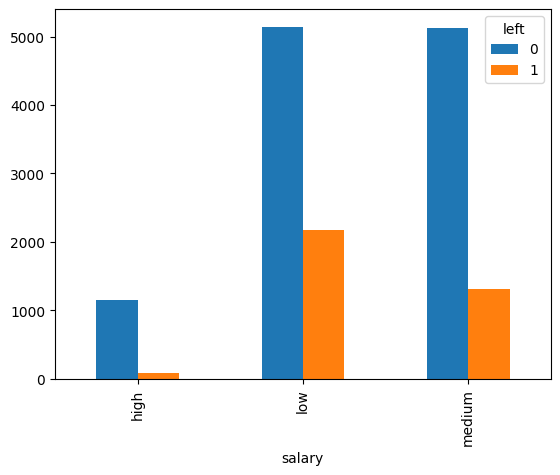

In [14]:
#Salary on retained
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

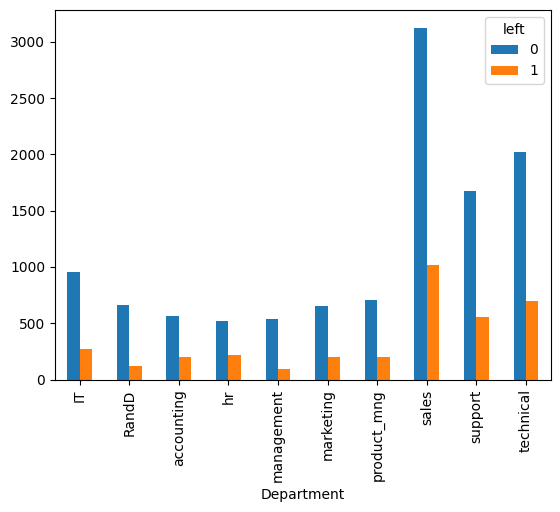

In [15]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [16]:
sub_df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
sub_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [17]:
#Encoding (Salary - Text to Numeric)

# One-hot encode the 'salary' column
salary_dummies = pd.get_dummies(sub_df["salary"], prefix="salary")

# Concatenate encoded columns with the original DataFrame
sub_df = pd.concat([sub_df, salary_dummies], axis=1)

# Drop the original 'salary' column
sub_df.drop("salary", axis=1, inplace=True)

# Convert boolean values to integers
sub_df = sub_df.astype(int)

In [18]:
sub_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0,157,0,0,1,0
1,0,262,0,0,0,1
2,0,272,0,0,0,1
3,0,223,0,0,1,0
4,0,159,0,0,1,0


In [19]:
#predicted variable
X = sub_df
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0,157,0,0,1,0
1,0,262,0,0,0,1
2,0,272,0,0,0,1
3,0,223,0,0,1,0
4,0,159,0,0,1,0


In [20]:
#Target variable
y = df.left
y.head()

,left
0,1
1,1
2,1
3,1
4,1


In [21]:
# Split data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [22]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
X_test[12:13]

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
14376,0,296,0,0,1,0


In [24]:
y_test[12:13]

,left
14376,1


In [25]:
model.predict(X_test[12:13])

array([0])

In [26]:
model.score(X_test,y_test)

0.7673333333333333

In [27]:
# Predict class labels
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [28]:
from sklearn.metrics import accuracy_score,classification_report,  roc_auc_score, roc_curve

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}\n")
print(classification_report(y_test,y_pred))

Model Accuracy: 0.7673
ROC-AUC Score: 0.6010

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2302
           1       0.00      0.00      0.00       698

    accuracy                           0.77      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.59      0.77      0.67      3000



# AUC - ROC Curve

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

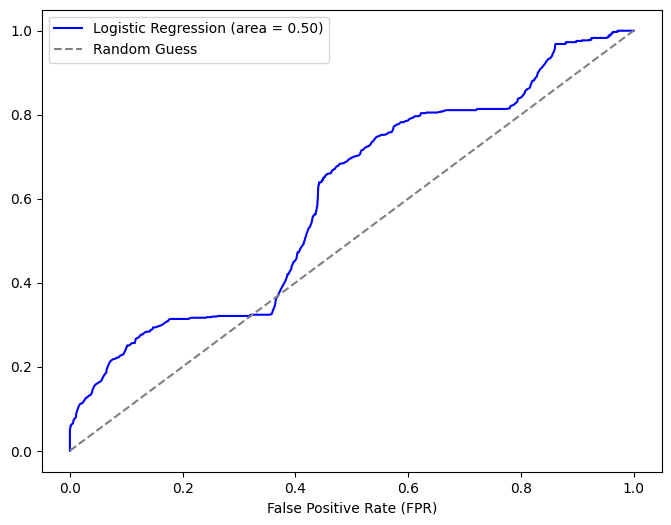

In [30]:
# Compute ROC AUC score
logistic_roc_auc = roc_auc_score(y_test, model.predict(X_test))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label= 'Logistic Regression (area = %0.2f)' % logistic_roc_auc, color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.legend(loc='best')